<a href="https://colab.research.google.com/github/pingao2019/DS-Unit-4-Sprint-1-NLP/blob/master/LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 





## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [0]:
%pwd

'/content'

In [0]:

import pandas as pd
#shops= pd.read_csv('./data/yelp_coffeeshop_review_data.csv')

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [0]:
shops.shape

(7616, 3)

In [0]:
shops['star_rating'].value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [0]:
shops1 = shops.copy()
shops1['star_rating'] = shops1['star_rating'].astype(str).str[1:4]
shops1['star_rating'] = shops1['star_rating'].astype(float)
shops1.head()

,coffee_shop_name,full_review_text,star_rating
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0
7615,The Steeping Room,5/23/2015 I finally stopped in for lunch with...,4.0


In [0]:
#shops['Rating'] = shops['star_rating'].apply(lambda x: 'good' if x >= 4 else 'bad')
shops1['Rating'] = shops1['star_rating'].apply(lambda x: 'good' if x >= 4 else 'bad')
shops1.head()


,coffee_shop_name,full_review_text,star_rating,Rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,good


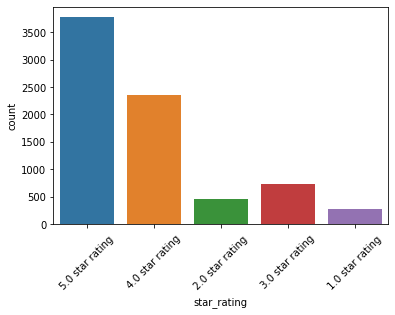

In [0]:
import seaborn as sns

chart=sns.countplot(shops1['star_rating'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);


In [0]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [0]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_sm')
doc = nlp(u"Access to documents independently of time and space")
spacy.displacy.serve(doc, style='dep')


# the spacy nlprocessor is loaded
nlp = spacy.load("en_core_web_lg")

# instantiate the tokenizer
tokenizer = Tokenizer(nlp.vocab)


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



In [0]:
import re



In [0]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [0]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [0]:
#How can we count the raw text?
shops['full_review_text'].value_counts(normalize=True)[:2]

 10/9/2016 The cafe is beautiful, the coffee was fantastic and very well presented, and the food was delicious. Must try!                                                                                                                                                                                                     0.000525
 10/13/2016 1 check-in I really enjoyed my visit here. I ordered the cortado and chicken waffle. Both were excellent.  The space is very Instagram worthy.  Awesome mural. Staff was very friendly too and I loved the iPad ordering system. Chicken waffle and cortado paired with sparkling water to cleanse the palate     0.000525
Name: full_review_text, dtype: float64

In [0]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [0]:
shops['tokens'].head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

In [0]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [0]:
# create a fuction which takes a corpus of document and returns and 
#dataframe of word counts for us to analyze.
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()
        
        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')




In [0]:
wc =count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
41,the,6847,34809,1.0,0.044537,0.044537,0.899028
70,and,6864,26650,2.0,0.034098,0.078634,0.901261
44,a,6246,22755,3.0,0.029114,0.107748,0.820116
15,i,5528,20237,4.0,0.025892,0.133641,0.725840
67,to,5653,17164,5.0,0.021961,0.155601,0.742253


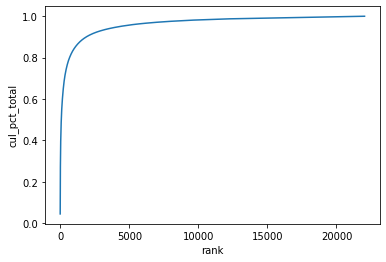

In [0]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [0]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.31101830776336686

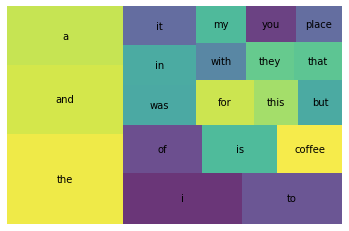

In [0]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
# Spacy indexes components and simply stores the lookup informaiton. 
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

import numpy

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['C:\\Users\\abc\\Anaconda3\\lib\\site-packages\\numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [0]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shopsgood['tokens'] = tokens

NameError: name 'tokenizer' is not defined

In [0]:
shops['tokens'].head()

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    [ , 11/25/2016, Very, cool, decor!, Good, drin...
4    [ , 12/3/2016, 1, check-in, They, are, located...
Name: tokens, dtype: object

In [0]:
wc= count(shops['tokens'])

In [0]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
54,the,6520,27779,1.0,0.034334,0.034334,0.856092
26,and,6804,25748,2.0,0.031824,0.066157,0.893382
27,,7616,22606,3.0,0.027940,0.094097,1.000000
45,a,6181,22085,4.0,0.027296,0.121394,0.811581
42,I,5469,19780,5.0,0.024447,0.145841,0.718093


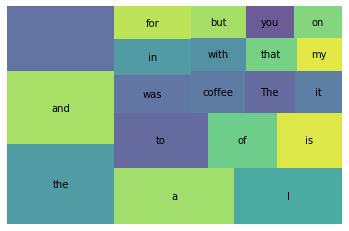

In [0]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

In [0]:
tokens =[]

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shopsgood['tokens'] = tokens



In [0]:
shopsgood.tokens.head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

In [0]:
STOP_WORDS = nlp.Defaults.stop_words.union(['on','I', 'in', 'and', 'for',"it's",  ' ', "to", 'it', 'the', 'this',])

In [0]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [0]:
wc = count(shops['tokens'])
wc.head()


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22,coffee,4210,8058,1.0,0.020155,0.020155,0.552784
73,place,3029,4264,2.0,0.010665,0.030821,0.397715
154,great,2438,3250,3.0,0.008129,0.038950,0.320116
195,like,2034,2902,4.0,0.007259,0.046208,0.267069
183,good,2084,2779,5.0,0.006951,0.053159,0.273634


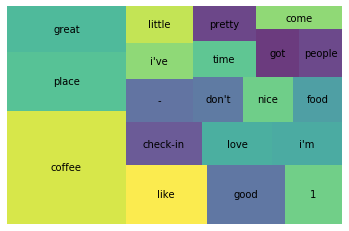

In [0]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
wc['appears_in_pct'].describe()

count    40488.000000
mean         0.001173
std          0.007218
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000525
max          0.552784
Name: appears_in_pct, dtype: float64

C:\Users\abc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


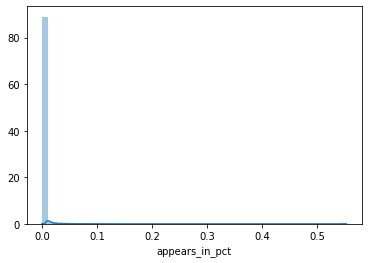

In [0]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

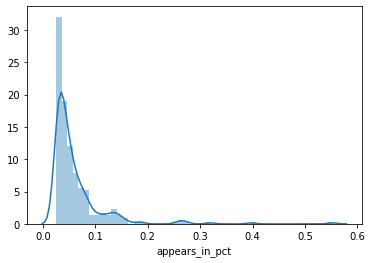

In [0]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

In [0]:
#Stemming: a process for removing the commoner morphological and inflexional 
#endings from words in English. Its main use is as part of a term normalisation
#process that is usually done when setting up Information Retrieval systems.

#from nltk.stem import PorterStemmer

#ps = PorterStemmer()

In [0]:
# Lemmatization

In [0]:
nlp = spacy.load("en_core_web_lg")



NameError: name 'spacy' is not defined

In [0]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [0]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)
shops['lemmas'].head()

In [0]:
wc = count(shopsbad['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

